# Music Recommendation System using K-Means Clustering

## Introduction

The goal of this project is to build a recommendation system for music based on the features of songs. We will use K-Means clustering to group similar songs together. Then, when a user provides a new song, we will recommend the 5 most similar songs using the numeric features of the songs. 

In the first part, we perform clustering using the K-Means algorithm, and then visualize the clusters. Then, we build a function to recommend songs based on their similarity to a given song.

...... (completed with recommendation system step)

## Data Preprocessing

Before we begin building our recommendation system, we need to preprocess the dataset. This involves scaling the numeric features so that they are in a comparable range.

In [2]:
# import all the require library
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [3]:
# read and show the data
spotify_data = pd.read_csv("data/Spotify Most Streamed Songs.csv")
spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


### Cleaning

In [4]:
# Drop all rows with any missing values
spotify_data.dropna(inplace=True)

# Check for remaining missing values
print(spotify_data.isnull().sum())

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
cover_url               0
dtype: int64


In [5]:
# Normalize Numerical Features 
# Normalizing numerical features ensures that all numeric columns are on a similar scale

# List of numerical features to normalize
numerical_cols = ['bpm', 'danceability_%', 'energy_%', 'streams', 'valence_%', 'acousticness_%', 'speechiness_%','liveness_%','instrumentalness_%']

# Check the data types of all columns
print(spotify_data.dtypes)
spotify_data['streams'] = pd.to_numeric(spotify_data['streams'], errors='coerce')

# Apply Min-Max Scaling or Standardization
scaler = MinMaxScaler()
spotify_data[numerical_cols] = scaler.fit_transform(spotify_data[numerical_cols])

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object


In [6]:
# Remove Irrelevant or Redundant Data
print(spotify_data.columns)
columns_to_remove = ['cover_url']
spotify_data.drop(columns= columns_to_remove)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,0.039685,43,...,0.425532,B,Major,0.780822,0.913978,0.831325,0.319588,0.000000,0.053191,0.032258
1,LALA,Myke Towers,1,2023,3,23,1474,48,0.037533,48,...,0.191489,C#,Major,0.657534,0.612903,0.722892,0.072165,0.000000,0.074468,0.032258
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,0.039298,94,...,0.517730,F,Major,0.383562,0.301075,0.469880,0.175258,0.000000,0.297872,0.064516
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,0.224794,116,...,0.744681,A,Major,0.438356,0.580645,0.698795,0.113402,0.000000,0.085106,0.209677
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,0.085117,84,...,0.560284,A,Minor,0.575342,0.204301,0.795181,0.144330,0.692308,0.085106,0.064516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,0.025676,61,...,0.560284,A,Major,0.506849,0.215054,0.301205,0.587629,0.000000,0.053191,0.016129
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,0.034208,4,...,0.716312,F#,Major,0.260274,0.032258,0.120482,0.855670,0.010989,0.095745,0.064516
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,0.020634,2,...,0.191489,C#,Major,0.780822,0.827957,0.638554,0.041237,0.000000,0.053191,0.064516
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,0.037584,29,...,0.226950,C#,Major,0.808219,0.677419,0.759036,0.082474,0.000000,0.095745,0.048387


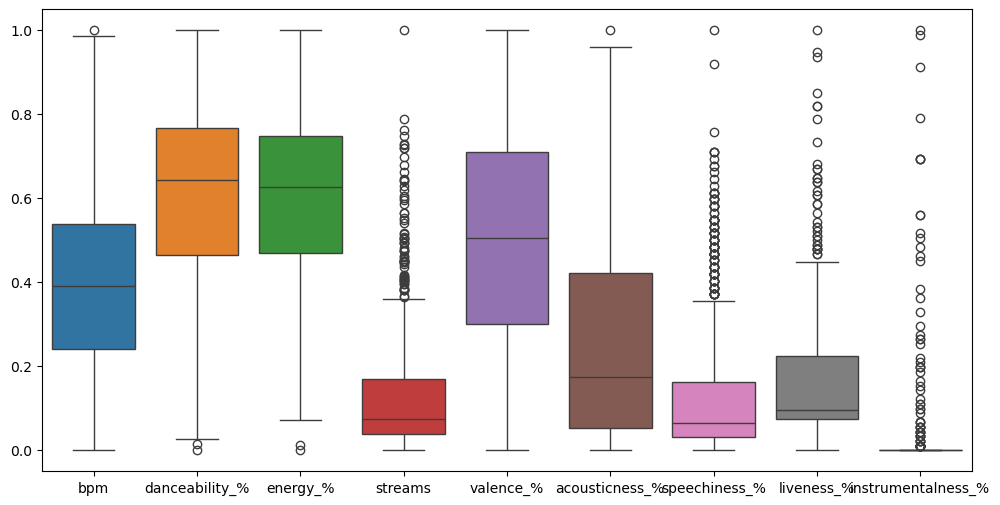

In [7]:
# Clean Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for visualizing outliers in numerical columns
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=spotify_data[numerical_cols])

# Display the plot
plt.show()

# Cap values for 'streams' and 'bpm' to 99th percentile
stream_threshold = spotify_data['streams'].quantile(0.99)
bpm_threshold = spotify_data['bpm'].quantile(0.99)
speechiness_threshold = spotify_data['speechiness_%'].quantile(0.99)
liveness_threshold = spotify_data['liveness_%'].quantile(0.99)
instrumentalness_threshold = spotify_data['instrumentalness_%'].quantile(0.99)


spotify_data['streams'] = spotify_data['streams'].clip(upper=stream_threshold)
spotify_data['bpm'] = spotify_data['bpm'].clip(upper=bpm_threshold)
spotify_data['speechiness_%'] = spotify_data['speechiness_%'].clip(upper=speechiness_threshold)
spotify_data['liveness_%'] = spotify_data['liveness_%'].clip(upper=liveness_threshold)
spotify_data['instrumentalness_%'] = spotify_data['instrumentalness_%'].clip(upper=instrumentalness_threshold)

# Remove outliers for streams and bpm that exceed certain thresholds
spotify_data = spotify_data[spotify_data['streams'] < stream_threshold]
spotify_data = spotify_data[spotify_data['bpm'] < bpm_threshold]
spotify_data = spotify_data[spotify_data['speechiness_%'] < speechiness_threshold]
spotify_data = spotify_data[spotify_data['liveness_%'] < liveness_threshold]
spotify_data = spotify_data[spotify_data['instrumentalness_%'] < instrumentalness_threshold]

## Feature Selection

We aim to group songs by their musical characteristics (e.g., tempo, danceability, energy), so variables like bpm, danceability_%, and energy_% are relevant. Variables unrelated to the song's sound or composition (e.g., streams, playlist/chart rankings) are not useful for clustering. 

Therefore, we only retain the musical characteristics in the spotify_dataset.

In [8]:
clustering_features = [
    'bpm', 'key', 'mode', 'danceability_%', 'valence_%',
    'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

spotify_clustering_data = spotify_data[clustering_features]
print("Clustering dataset preview:")
print(spotify_clustering_data.head())

Clustering dataset preview:
        bpm key   mode  danceability_%  valence_%  energy_%  acousticness_%  \
0  0.425532   B  Major        0.780822   0.913978  0.831325        0.319588   
1  0.191489  C#  Major        0.657534   0.612903  0.722892        0.072165   
2  0.517730   F  Major        0.383562   0.301075  0.469880        0.175258   
3  0.744681   A  Major        0.438356   0.580645  0.698795        0.113402   
5  0.539007  C#  Major        0.945205   0.666667  0.530120        0.195876   

   instrumentalness_%  liveness_%  speechiness_%  
0                 0.0    0.053191       0.032258  
1                 0.0    0.074468       0.032258  
2                 0.0    0.297872       0.064516  
3                 0.0    0.085106       0.209677  
5                 0.0    0.053191       0.354839  


## Clustering with K-means

To group similar songs together, we use the K-Means clustering algorithm. The first step in clustering is to determine the optimal number of clusters, which can be done using the **Elbow Method**.

In [9]:
numeric_features = spotify_clustering_data.drop(columns=['key', 'mode'])
numeric_features.head()

,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.425532,0.780822,0.913978,0.831325,0.319588,0.0,0.053191,0.032258
1,0.191489,0.657534,0.612903,0.722892,0.072165,0.0,0.074468,0.032258
2,0.517730,0.383562,0.301075,0.469880,0.175258,0.0,0.297872,0.064516
3,0.744681,0.438356,0.580645,0.698795,0.113402,0.0,0.085106,0.209677
5,0.539007,0.945205,0.666667,0.530120,0.195876,0.0,0.053191,0.354839


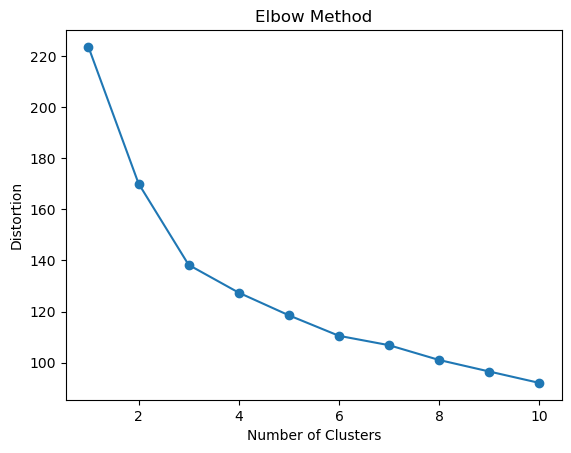

In [10]:
# Use an Elbow Method (for Clustering)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_features)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

We calculate the **inertia** (within-cluster sum of squares) for different values of k and plot the results. The "elbow" in the plot indicates the optimal number of clusters. In this case, we will use **k=3**, as it shows the best separation between groups.

After finding the optimal number of clusters, we fit the K-Means model with `k=3` and label each song based on the cluster it belongs to.

In [11]:
from sklearn.cluster import KMeans

# Step 1: Fit K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numeric_features)

# Step 2: Get the labels
labels = kmeans.labels_

# Step 3: Avoid SettingWithCopyWarning by ensuring a copy of the DataFrame
spotify_clustering_data = spotify_clustering_data.copy()
spotify_clustering_data['Cluster_Label'] = labels

# Step 4: Verify the label assignment
print("Labels assigned to each song:")
print(spotify_clustering_data['Cluster_Label'].value_counts())  # Check label distribution

Labels assigned to each song:
Cluster_Label
1    341
0    284
2    146
Name: count, dtype: int64


In [12]:
spotify_clustering_data.to_csv("labeled_songs.csv", index=False)
print("Labeled dataset saved to 'labeled_songs.csv'.")

Labeled dataset saved to 'labeled_songs.csv'.


### Visualizing Clusters in 2D

After fitting the K-Means model, we want to visualize the clusters in two dimensions. Since our data has multiple features, we use **Principal Component Analysis (PCA)** to reduce the dimensions to two. This allows us to plot the data and visually observe how well the clustering has separated the songs.

We will plot the data points in a 2D space, where each color represents a different cluster.

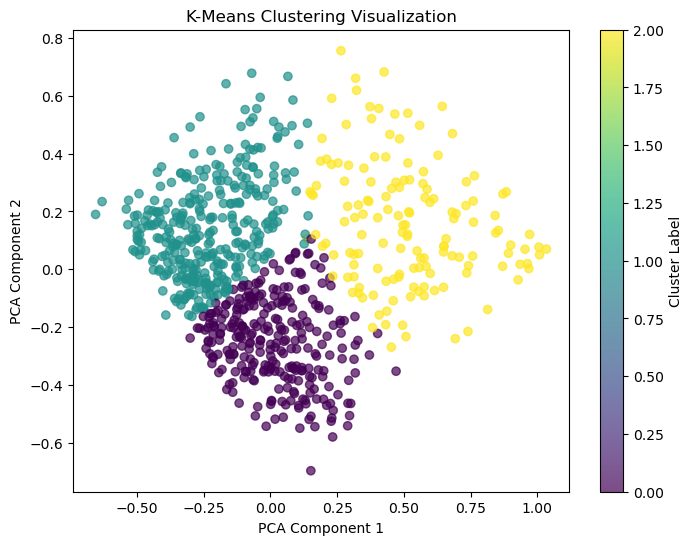

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(numeric_features)

# Step 2: Create a scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

### Song Recommendation System

Now that we have the clusters, we can build a function to recommend similar songs based on the cluster a song belongs to. When a user provides a song, the function will find the cluster label of that song, then recommend the 5 songs from the same cluster that are closest to the given song in terms of feature similarity.

We will use the **K-Nearest Neighbors (KNN)** algorithm to find the closest songs within the same cluster. The function will return the top 5 most similar songs.

In [14]:
spotify_clustering_data.head()

,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Cluster_Label
0,0.425532,B,Major,0.780822,0.913978,0.831325,0.319588,0.0,0.053191,0.032258,1
1,0.191489,C#,Major,0.657534,0.612903,0.722892,0.072165,0.0,0.074468,0.032258,1
2,0.517730,F,Major,0.383562,0.301075,0.469880,0.175258,0.0,0.297872,0.064516,0
3,0.744681,A,Major,0.438356,0.580645,0.698795,0.113402,0.0,0.085106,0.209677,0
5,0.539007,C#,Major,0.945205,0.666667,0.530120,0.195876,0.0,0.053191,0.354839,1


In [24]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def recommend_songs(song_index, data, n_recommendations=5):
    """
    Recommend similar songs based on KNN within the same cluster.
    
    Parameters:
        song_index (int): Index of the input song.
        data (DataFrame): DataFrame with normalized numeric data.
        n_recommendations (int): Number of recommendations.
    
    Returns:
        DataFrame: Recommended songs with names, artists.
    """
    # Step 1: Find the cluster label of the input song
    song_cluster = spotify_clustering_data.iloc[song_index]['Cluster_Label']
    
    # Step 2: Filter songs that belong to the same cluster
    cluster_data = spotify_clustering_data[spotify_clustering_data['Cluster_Label'] == song_cluster]
    
    # Step 3: Initialize the KNN model inside the function
    knn = NearestNeighbors(n_neighbors=n_recommendations + 1, metric='euclidean')
    
    # Step 4: Fit the KNN model to songs within the same cluster using NumPy arrays
    knn.fit(cluster_data[numeric_features.columns].values)  # Using .values to avoid feature name warning
    
    # Step 5: Find the nearest neighbors within the same cluster
    distances, indices = knn.kneighbors([data.iloc[song_index].values])  # Using .values for consistency
    
    # Step 6: Retrieve the recommended songs
    recommendations = cluster_data.iloc[indices[0][1:]]  # Exclude the song itself (first index)
    
    # Step 7: Add distance column to the recommendations DataFrame
    recommendations = recommendations.copy()
    recommendations['Distance'] = distances[0][1:] 
    
    # Step 8: Merge with the original data to include song names and artists
    recommendations = recommendations.merge(
        spotify_data[['track_name', 'artist(s)_name']],
        left_index=True,
        right_index=True
    )
    
    return recommendations[['track_name', 'artist(s)_name']]

# Example
song_index = 1 
recommendations = recommend_songs(song_index=song_index, data=numeric_features, n_recommendations=5)
print(recommendations)

           track_name            artist(s)_name
375       Besos Moja2  Wisin & Yandel, ROSALï¿½
345  SPIT IN MY FACE!                  ThxSoMch
695         Adore You              Harry Styles
735    Wait a Minute!                    Willow
37        Blank Space              Taylor Swift


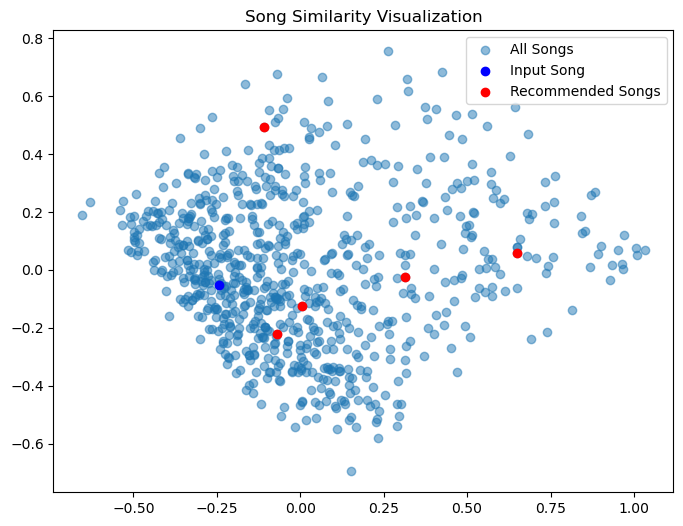

In [25]:
def visualize_recommendations(song_index, recommendations, data):
    """
    Visualizes the input song and its recommended songs using PCA.
    
    Parameters:
        song_index (int): Index of the input song.
        recommendations (DataFrame): Recommended songs.
        data (DataFrame): DataFrame with the numeric features of songs.
    """
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    
  
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5, label='All Songs')
    plt.scatter(reduced_data[song_index, 0], reduced_data[song_index, 1], color='blue', label='Input Song')
    plt.scatter(reduced_data[recommendations.index, 0], reduced_data[recommendations.index, 1], color='red', label='Recommended Songs')
    
    plt.title('Song Similarity Visualization')
    plt.legend()
    plt.show()

visualize_recommendations(song_index=song_index, recommendations=recommendations, data=numeric_features)

This visualization demonstrates the similarity of songs in a reduced 2D feature space using PCA. Each dot represents a song, with light blue dots indicating all songs in the dataset, the blue dot representing the input song, and the red dots showing songs recommended by the KNN model. The clustering of red dots around the blue dot suggests that the KNN model effectively identified songs with similar characteristics to the input song. By projecting high-dimensional data into a two-dimensional space, PCA helps visualize relationships and validates that the recommended songs are close to the input song, indicating good model performance.

## Build recommendation system

In [28]:
import ipywidgets as widgets
from IPython.display import display

# Create a mapping of song names to their indices
song_name_to_index = {row['track_name']: idx for idx, row in spotify_data.iterrows()}

# Input: Dropdown for selecting a song by name
song_dropdown = widgets.Dropdown(
    options=list(song_name_to_index.keys()),  # List of song names
    value=list(song_name_to_index.keys())[0],  # Default to the first song name
    description='Song:',
)

# Button for triggering recommendations
recommend_button = widgets.Button(description="Get Recommendations")

# Output: Display recommendations
output = widgets.Output()

# Function to handle recommendations
def on_recommend_button_click(_):
    with output:
        output.clear_output()
        # Get the song index from the selected song name
        selected_song_name = song_dropdown.value
        song_index = song_name_to_index[selected_song_name]
        
        # Get recommendations
        recommendations = recommend_songs(song_index, numeric_features, n_recommendations=5)
        
        # Display recommendations
        print(f"Recommendations for '{selected_song_name}':\n")
        print(recommendations)

recommend_button.on_click(on_recommend_button_click)
display(song_dropdown, recommend_button, output)

Dropdown(description='Song:', options=('Seven (feat. Latto) (Explicit Ver.)', 'LALA', 'vampire', 'Cruel Summer…

Button(description='Get Recommendations', style=ButtonStyle())

Output()

## Discussion

### K-means Clustering Model
   
K-means is an unsupervised machine learning algorithm used to group similar items into clusters. In this case, it groups songs based on their numeric features (such as tempo, key, loudness, etc.). The K-means model divides the dataset into 3 clusters based on these features, with each cluster representing songs that share similar characteristics.


The key idea behind using clustering is that songs within the same cluster are likely to be similar in sound or style. Therefore, users can explore songs within a given cluster to find other songs with similar qualities. For instance, if a user likes a song from a particular cluster, they might enjoy other songs in the same cluster because they share similar musical attributes.

### KNN Model is Used for Recommendations

KNN, on the other hand, is used to find the nearest neighbors to a given song. The algorithm finds the most similar songs in the dataset based on the features of the song. When a user provides a song (via its index or specific features), the model identifies the song’s cluster using the K-means model. It is meaningful for recommendation. KNN then uses the clustering result to recommend the 5 most similar songs within the same cluster, based on Euclidean distance. This means that the closer two songs are in the feature space (i.e., the more similar they are), the more likely they are to be recommended to the user.

### Practical Example of Use

Let’s say a user loves the song “Song A” (chosen from the dataset). They input this song into the system, and the K-means model identifies the cluster it belongs to. The KNN model is then used to recommend the 5 most similar songs in the same cluster. These songs will share similar musical characteristics with “Song A,” helping the user discover songs they are likely to enjoy.

By using the K-means and KNN models together, the system ensures that recommendations are not random but instead are based on the underlying features that define the music, providing a more accurate and meaningful suggestion system. This approach can be scaled to handle a much larger dataset, and as more songs are added, the recommendations will still be relevant due to the clustering process.


- Key Benefits for Users
	1. Personalization: The system tailors recommendations based on the user’s initial song choice, ensuring that suggested songs are relevant to the user’s taste.
	2.	Diversity of Suggestions: By using clustering, users can receive suggestions from various “types” of music, all of which are similar but distinct in their sound, allowing for exploration within a defined space of similar songs.
	3.	Ease of Use: The process is straightforward—users just need to provide a song, and the system will do the rest, recommending 5 similar songs with minimal user input.

### Limitations and Further Improvements

While this system works well with the dataset provided, it could be improved by considering additional features (e.g., genre, artist) or incorporating feedback from users to refine the recommendations. Additionally, incorporating more sophisticated models or hybrid recommendation systems could improve the accuracy of the suggestions.

In conclusion, this project provides a practical and user-friendly music recommendation system based on clustering and nearest neighbor algorithms. It allows users to discover similar songs effortlessly, enhancing their music experience and helping them explore new music aligned with their preferences.